<a href="https://colab.research.google.com/github/pavan-kalam/Hack-A-Roo-Project-Deep-Fake/blob/main/Hack_A_Roo(Deep_Fake).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries
!pip install opendatasets

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image
import io
import os
import matplotlib.pyplot as plt
import opendatasets as od
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, HTML
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
def download_dataset():
    if not os.path.exists('/content/drive/MyDrive/deepfake-and-real-images'):
        print("Downloading dataset...")
        od.download("https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images")
        print("Dataset downloaded successfully!")
    else:
        print("Dataset already exists!")

In [4]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", padding='same', input_shape=(128, 128, 3)),
        layers.Conv2D(32, (3,3), activation="relu", padding='same'),
        layers.MaxPooling2D((2,2), strides=(2, 2)),

        layers.Conv2D(64, (3,3), activation="relu", padding='same'),
        layers.Conv2D(64, (3,3), activation="relu", padding='same'),
        layers.MaxPooling2D((2,2), strides=(2, 2)),

        layers.Conv2D(128, (3,3), activation="relu", padding='same'),
        layers.Conv2D(128, (3,3), activation="relu", padding='same'),
        layers.MaxPooling2D((2,2), strides=(2, 2)),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

    optimizer = Adam(learning_rate=0.0001)  # Reduced learning rate
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

    return model

In [5]:
def load_dataset(path):
    return tf.keras.utils.image_dataset_from_directory(
        path,
        labels='inferred',
        label_mode='binary',
        color_mode="rgb",
        batch_size=32,
        image_size=(128, 128),
        shuffle=True,
        seed=123,
    )

In [6]:
def train_model(model, train_data, val_data, epochs=20):
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    history = model.fit(
        train_data,
        epochs=epochs,
        validation_data=val_data,
        callbacks=[early_stopping_cb]
    )

    return history

In [7]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [8]:
def preprocess_image(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = image.resize((128, 128))
    image_array = np.array(image)
    image_array = image_array.astype('float32') / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

In [9]:
23347953# Download the dataset
print("Checking for dataset...")
download_dataset()

# Create the model
model = create_model()

Checking for dataset...
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pavankalam
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images


100%|██████████| 1.68G/1.68G [00:12<00:00, 150MB/s]



Dataset downloaded successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Load and preprocess the dataset
dataset_path = 'deepfake-and-real-images/Dataset'
train_data = load_dataset(os.path.join(dataset_path, 'Train'))
val_data = load_dataset(os.path.join(dataset_path, 'Validation'))

Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


Training new model...
Epoch 1/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 221s 47ms/step - accuracy: 0.7917 - loss: 0.4555 - val_accuracy: 0.9110 - val_loss: 0.2088
Epoch 2/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 199s 46ms/step - accuracy: 0.9375 - loss: 0.1537 - val_accuracy: 0.9233 - val_loss: 0.2015
Epoch 3/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 198s 45ms/step - accuracy: 0.9581 - loss: 0.1075 - val_accuracy: 0.9452 - val_loss: 0.1469
Epoch 4/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 216s 49ms/step - accuracy: 0.9668 - loss: 0.0830 - val_accuracy: 0.9484 - val_loss: 0.1441
Epoch 5/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 243s 45ms/step - accuracy: 0.9744 - loss: 0.0655 - val_accuracy: 0.9554 - val_loss: 0.1364
Epoch 6/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 202s 45ms/step - accuracy: 0.9799 - loss: 0.0523 - val_accuracy: 0.9554 - val_loss: 0.1428
Epoch 7/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 215s 49ms/step - accuracy: 0.9842 - loss: 0.0417 - val_accuracy: 0.9572 - val_loss: 0.1687
Epoch 8/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 245s 

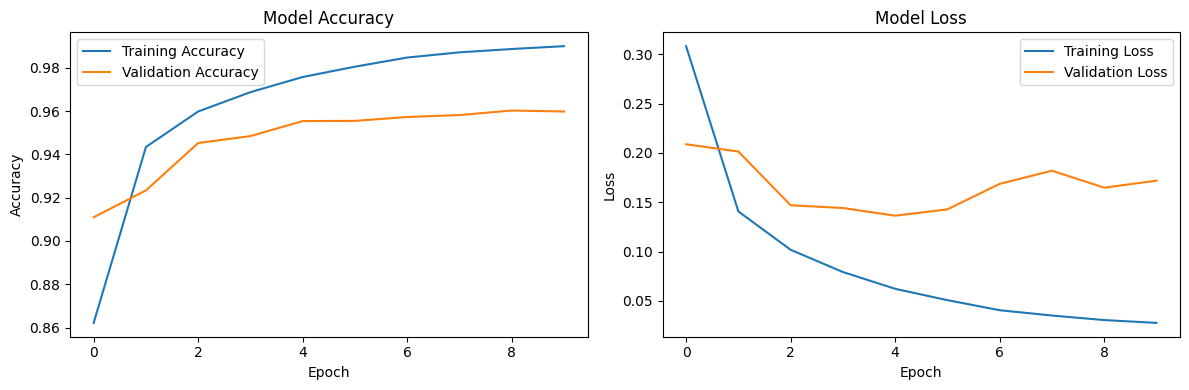

Model trained and saved.


In [11]:
# Train the model
print("Training new model...")
history = train_model(model, train_data, val_data)

# Plot and save training history
plot_history(history)

# Save the trained model
model.save('/content/drive/MyDrive/deepfake-detector-model-earlystop.keras')
print("Model trained and saved.")

Found 10905 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━

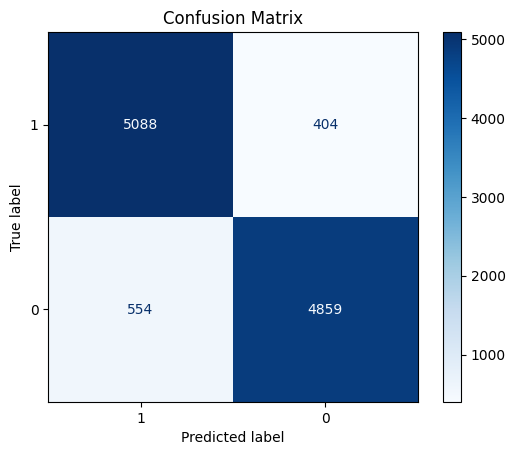

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, test_data):
    # Get true labels and predictions
    true_labels = []
    predictions = []

    for images, labels in test_data:
        preds = model.predict(images)
        preds = (preds >= 0.5).astype(int)  # Convert probabilities to binary predictions
        true_labels.extend(labels.numpy())
        predictions.extend(preds.flatten())

    return true_labels, predictions

# Load test dataset
test_data = load_dataset(os.path.join(dataset_path, 'Test'))

# Evaluate the model
true_labels, predictions = evaluate_model(model, test_data)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1", "0"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [11]:
from tensorflow.keras.models import load_model


# Load the model from storage
model = load_model("/content/drive/MyDrive/models/deepfake-detector-model.keras")

In [12]:
def predict_image(image):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)[0][0]
    result = "FAKE" if prediction >= 0.5 else "REAL"
    confidence = float(prediction) if prediction >= 0.5 else float(1 - prediction)
    confidence = confidence * 100
    return result, confidence

def handle_upload(change):
    uploaded_files = change['new']
    if uploaded_files:
        for filename, file_info in uploaded_files.items():
            content = file_info['content']
            image = Image.open(io.BytesIO(content))
            result, confidence = predict_image(image)

            display(image)
            print(f"Filename: {filename}")
            print(f"Prediction: {result}")
            print(f"Confidence: {confidence:.2f}%")
            print("-" * 30)

FileUpload(value={}, accept='image/*', description='Upload')

Button(description='Clear Upload', style=ButtonStyle())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


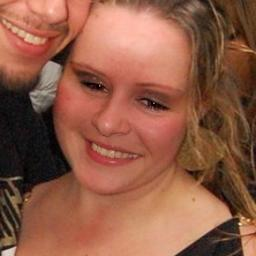

Filename: fake_1002.jpg
Prediction: FAKE
Confidence: 52.40%
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


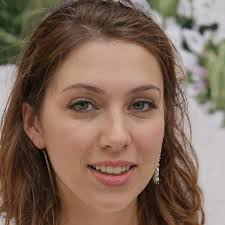

Filename: images.jpeg
Prediction: REAL
Confidence: 95.45%
------------------------------


In [15]:
# Create a file upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
upload_widget.observe(handle_upload, names='value')

# Display the interface
display(HTML("<h2>Deepfake Image Detector</h2>"))
display(HTML("<p>Upload an image to check if it's real or fake:</p>"))
display(upload_widget)

# Clear the widget value after each upload
def clear_upload(button):
    upload_widget.value.clear()
    upload_widget._counter = 0

clear_button = widgets.Button(description="Clear Upload")
clear_button.on_click(clear_upload)
display(clear_button)